In [56]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import datasets, layers, models, applications, optimizers

In [2]:
# Collect the data (Both Training and Test Datasets)
train_path = os.listdir("/content/drive/MyDrive/Basic Machine Learning/Week 13 - Final Year Project/Dataset/Data/train")
test_path = os.listdir("/content/drive/MyDrive/Basic Machine Learning/Week 13 - Final Year Project/Dataset/Data/test")
print (train_path)
print(test_path)
classes_train = {'Normal_Cell':0, 'Adenocarcinoma':1, 'Large_Cell_Carcinoma':2, 'Squamous_Cell_Carcinoma':3}
classes_test = {'Normal_Cell':0, 'Adenocarcinoma':1, 'Large_Cell_Carcinoma':2, 'Squamous_Cell_Carcinoma':3}

['Adenocarcinoma', 'Large_Cell_Carcinoma', 'Squamous_Cell_Carcinoma', 'Normal_Cell']
['Adenocarcinoma', 'Normal_Cell', 'Large_Cell_Carcinoma', 'Squamous_Cell_Carcinoma']


In [36]:
# Prepare data (Convert into greyscale and resize all images)
X_train = []
Y_train = []

X_test = []
Y_test = []

for cls in classes_train:
  pth_train = "/content/drive/MyDrive/Basic Machine Learning/Week 13 - Final Year Project/Dataset/Data/train/"+cls
  for i in os.listdir(pth_train):
    img_train = cv2.imread(pth_train+'/'+i, 0)
    img_train = cv2.resize(img_train, (224, 224))
    X_train.append(img_train)
    Y_train.append(classes_train[cls])

for cls in classes_test:
  pth_test = "/content/drive/MyDrive/Basic Machine Learning/Week 13 - Final Year Project/Dataset/Data/test/"+cls
  for j in os.listdir(pth_test):
    img_test = cv2.imread(pth_test+'/'+j, 0)
    img_test = cv2.resize(img_test, (224, 224))
    X_test.append(img_test)
    Y_test.append(classes_test[cls])

In [ ]:
# Check data
np.unique(Y_train)

array([0, 1, 2, 3])

In [ ]:
np.unique(Y_test)

array([0, 1, 2, 3])

In [37]:
# Convert to Array
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [38]:
pd.Series(Y_train).value_counts()

1    195
3    155
0    148
2    115
dtype: int64

In [39]:
pd.Series(Y_test).value_counts()

1    120
3     90
0     54
2     51
dtype: int64

In [40]:
# View the dimensionallity of the data
X_train.shape

(613, 224, 224)

In [41]:
X_test.shape

(315, 224, 224)

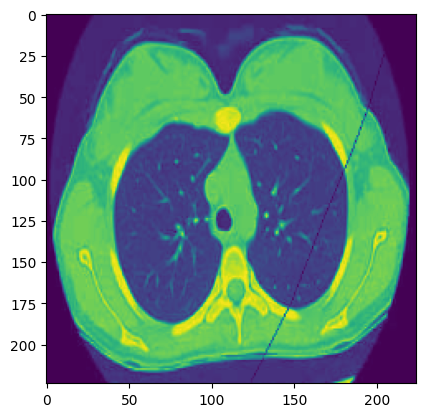

In [42]:
plt.imshow(X_train[0])

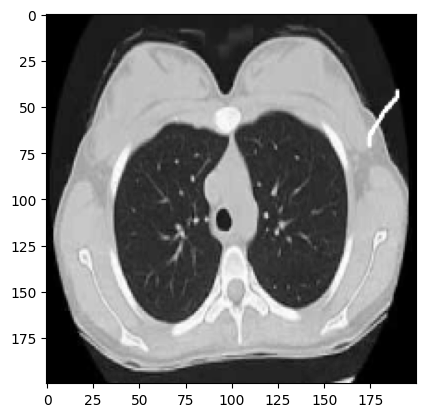

In [ ]:
plt.imshow(X_test[0], cmap = 'gray')

In [43]:
# Convert the data into a 2-Dimensional data rather than 3-Dimensional
x_train_updated = X_train.reshape(len(X_train), -1)
x_train_updated.shape

(613, 50176)

In [44]:
# Convert the data into a 2-Dimensional data rather than 3-Dimensional
x_test_updated = X_test.reshape(len(X_test), -1)
x_test_updated.shape

(315, 50176)

In [45]:
# Split the data

#xtrain, xtest, ytrain, ytest = train_test_split(x_updated, Y, random_state=10, test_size = .20)

xtrain = x_train_updated
xtest = x_test_updated
ytrain = Y_train
ytest = Y_test

In [46]:
xtrain.shape, xtest.shape

((613, 50176), (315, 50176))

In [47]:
# Feature Scaling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

xtrain = xtrain/255
xtest = xtest/255

print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [48]:
print(xtrain.shape, xtest.shape)
pca = PCA(0.98)

pca_train = xtrain
pca_test = xtest

(613, 50176) (315, 50176)


In [91]:
# Train the Model
svm_model = SVC(kernel ='rbf', C = 100)
svm_model.fit(pca_train, ytrain)

SVC(C=100)

In [92]:
# Evaluate Model
train_result = svm_model.score(pca_train, ytrain)
test_result = svm_model.score(pca_test, ytest)
print("The Training Score is: ", train_result)
print("The Test Score is :", test_result)

The Training Score is:  0.99836867862969
The Test Score is : 0.6063492063492063


In [51]:
# Prediction
y_predict = svm_model.predict(pca_test)

In [69]:
#Conusion Matrix
confusion = confusion_matrix(ytest, y_predict)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[54  0  0  0]
 [ 0 68 42 10]
 [ 0  6 42  3]
 [ 0 46 17 27]]


In [53]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(ytest, y_predict)))


Accuracy: 0.61



In [70]:
print('Classification Report')
print(classification_report(ytest, y_predict, target_names=['Normal_Cell', 'Adenocarcinoma',
                                                            'Large_Cell_Carcinoma', 'Squamous_Cell_Carcinoma']))

Classification Report
                         precision    recall  f1-score   support

            Normal_Cell       1.00      1.00      1.00        54
         Adenocarcinoma       0.57      0.57      0.57       120
   Large_Cell_Carcinoma       0.42      0.82      0.55        51
Squamous_Cell_Carcinoma       0.68      0.30      0.42        90

               accuracy                           0.61       315
              macro avg       0.66      0.67      0.63       315
           weighted avg       0.65      0.61      0.60       315



In [ ]:
# TEST THE MODEL ON UNSEEN DATA

In [ ]:
#Decode
dec = {0:'Normal', 1:'Adenocarcinoma_Tumor', 2:'Large_Cell_Carcinoma_Tumor', 3:'Squamous_Cell_Carcinoma_Tumor'}

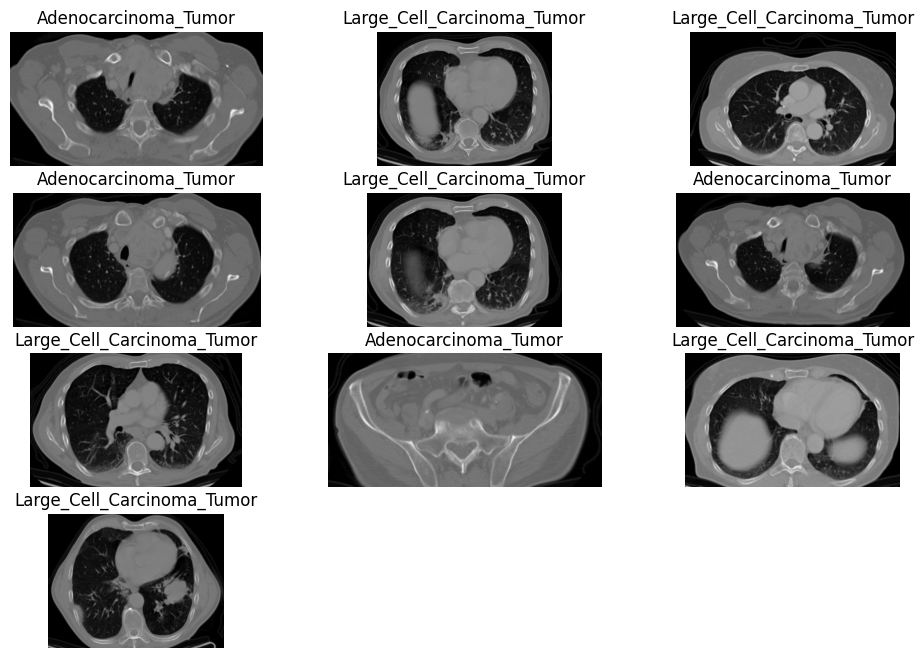

In [ ]:
plt.figure(figsize = (12,8))
p = os.listdir('/content/drive/MyDrive/Basic Machine Learning/Week 13 - Final Year Project/Dataset/Data/valid/')
c = 1

for  i in os.listdir('/content/drive/MyDrive/Basic Machine Learning/Week 13 - Final Year Project/Dataset/Data/valid/Large_Cell_Carcinoma_Tumor/')[:10]:
  plt.subplot(4,3,c)

  img = cv2.imread('/content/drive/MyDrive/Basic Machine Learning/Week 13 - Final Year Project/Dataset/Data/valid/Large_Cell_Carcinoma_Tumor/'+i, 0)
  img1 = cv2.resize(img, (200, 200))
  img1 = img1.reshape(1, -1)/255
  p = svm_model.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img, cmap = 'gray')
  plt.axis('off')
  c+=1

CONVOLUTIONAL NEURAL NETWORK VIA TRANSFER LEARNING

In [ ]:
base_model = applications.vgg16.VGG16(input_shape=(224,224,3),
                                include_top = False,
                                weights = 'imagenet')

In [ ]:
# Prepare data (Convert into greyscale and resize all images)
classes_train = {'Normal_Cell':0, 'Adenocarcinoma':1, 'Large_Cell_Carcinoma':2, 'Squamous_Cell_Carcinoma':3}
classes_test = {'Normal_Cell':0, 'Adenocarcinoma':1, 'Large_Cell_Carcinoma':2, 'Squamous_Cell_Carcinoma':3}

X_train = []
Y_train = []

X_test = []
Y_test = []

for cls in classes_train:
  pth_train = "/content/drive/MyDrive/Basic Machine Learning/Week 13 - Final Year Project/Dataset/Data/train/"+cls
  for i in os.listdir(pth_train):
    # Convert BGR image to
    brg_img_train = cv2.imread(pth_train+'/'+i)
    rbg_img_train = cv2.cvtColor(brg_img_train, cv2.COLOR_BGR2RGB)
    Resize_img_train = cv2.resize(rbg_img_train, (224, 224))

    #Normalize (cv2.normalize())
    norm_img_train = np.zeros((244, 244, 3))
    normalized_img_train = cv2.normalize(Resize_img_train, norm_img_train, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img_train = normalized_img_train

    X_train.append(img_train)
    Y_train.append(classes_train[cls])

for cls in classes_test:
  pth_test = "/content/drive/MyDrive/Basic Machine Learning/Week 13 - Final Year Project/Dataset/Data/test/"+cls
  for j in os.listdir(pth_test):
    # Convert BGR image to
    brg2_img_test = cv2.imread(pth_test+'/'+j)
    rbg2_img_test = cv2.cvtColor(brg2_img_test, cv2.COLOR_BGR2RGB)
    Resize_img_test = cv2.resize(rbg2_img_test, (224, 224))

    #Normalize
    norm_img_test = np.zeros((224, 224, 3))
    normalized_img_test = cv2.normalize(Resize_img_test, norm_img_test, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img_test = normalized_img_test

    X_test.append(img_test)
    Y_test.append(classes_test[cls])

In [ ]:
base_model.trainable = False

for layer in base_model.layers[-6:]:
  layer.trainable = True

new_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(516, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(516, activation ='relu'),
    layers.Dropout(0.2),
    layers.Dense(516, activation='relu'),
    layers.Dense(4, activation='softmax')
])

new_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [ ]:
# Convert to numpy array
xtrain = np.array(X_train)
ytrain = np.array(Y_train)

xtest = np.array(X_test)
ytest = np.array(Y_test)

In [ ]:
# Model Description
new_model.summary()

In [ ]:
# Run Model
history = new_model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest), batch_size=50)

In [ ]:
# Plot the Accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Progression')
plt.ylim([0.5,1])
plt.legend(loc='best')
plt.show()

In [ ]:
# Plot the Loss Function
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('sparse_categorical_crossentropy')
plt.title('Loss Function Progression')
#plt.ylim([0.5,1])
plt.legend(loc='best')
plt.show()